# Predicting whether a Passenger is Survived using Machine Learning

## 1. Problem Definition
> Given the details of a subset of the passengers on board and information whether they survived or not. The task is to train a model so that it can predict whether a passenger survived or not based on their information

## 2. Data
The original data came from the Titanic data from the Kaggle https://www.kaggle.com/competitions/titanic/overview

## 3. Evaluation

> Aiming for as high as possible accuracy at predicting whether a passenger survived

## 4. Features

1. PassengerID
2. Survived
   * 0: No
   * 1: Yes
3. Pclass - A proxy for socio-economic status (SES)
   * 1st = Upper
   * 2nd = Middle
   * 3rd = Lower
4. Name
5. Sex
6. Age
7. SibSp - # of siblings / spouses aboard the Titanic
   * Sibling = brother, sister, stepbrother, stepsister
   * Spouse = husband, wife (mistresses and fiances were ignored)
8. Parch - # of parents / children aboard the Titanic
   * Parent = mother, father
   * Child = daughter, son, stepdaughter, stepson
   * Some children travelled only with a nanny, therefore parch = 0 for them
9. Ticket - ticket number
10. Fare - passenger fare
11. Cabin - cabin number
12. Port of Embarkation
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

## Preparing the tools

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [133]:
titanic = pd.read_csv("./data/titanic/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [134]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Distribution**

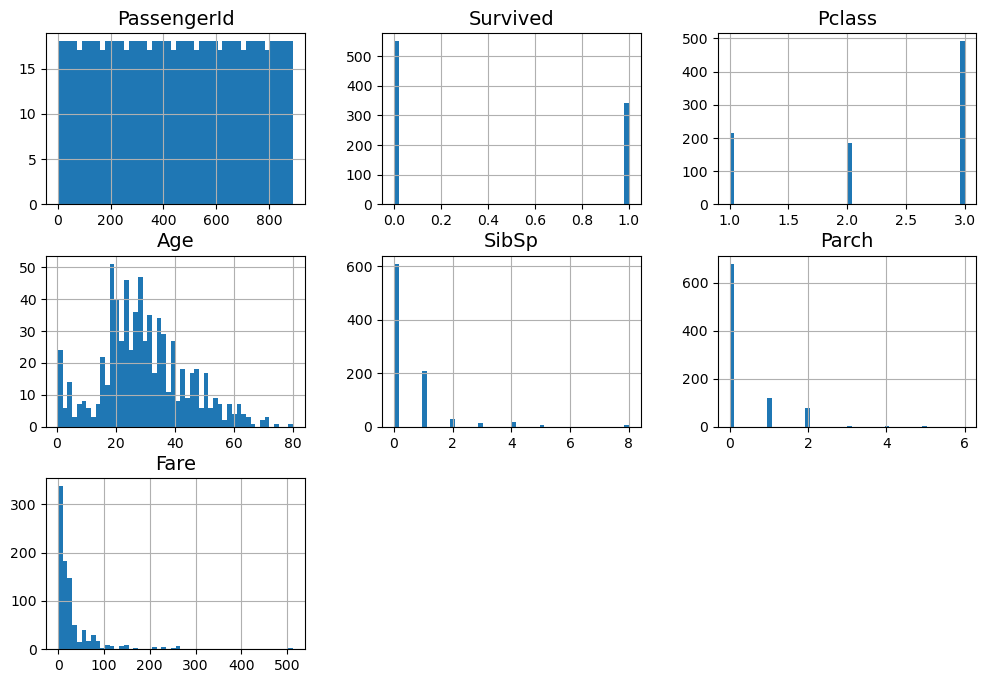

In [135]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

titanic.hist(bins=50, figsize=(12, 8))
plt.show()

In [136]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


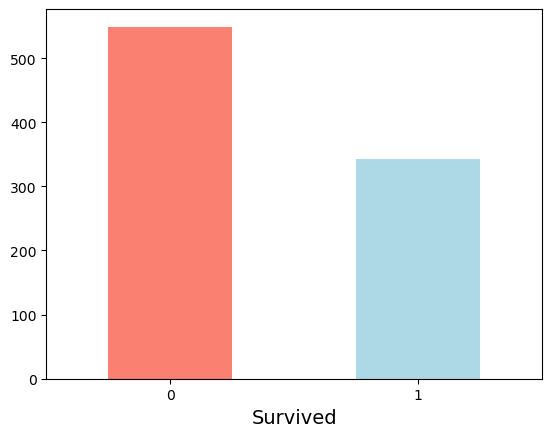

In [138]:
titanic["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=0)
plt.show()

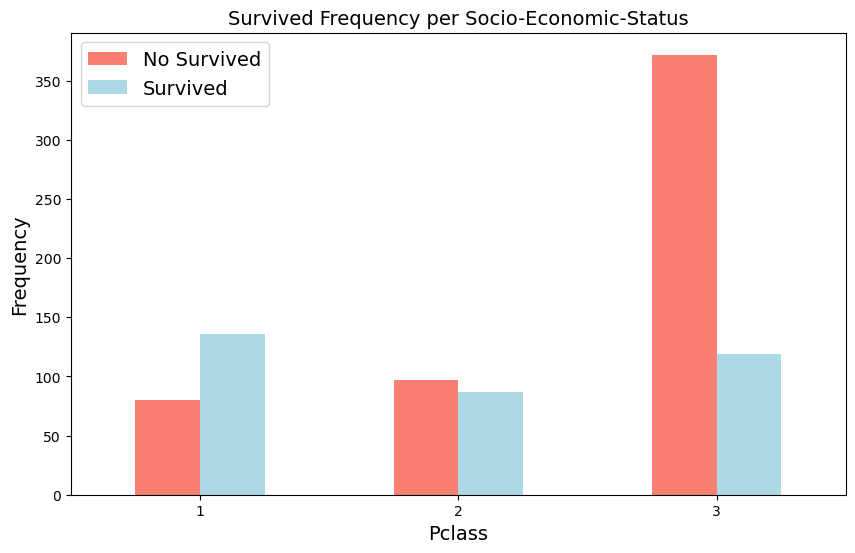

In [139]:
pd.crosstab(titanic.Pclass, titanic.Survived).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Survived Frequency per Socio-Economic-Status")
plt.ylabel("Frequency")
plt.legend(["No Survived", "Survived"])
plt.xticks(rotation=0)
plt.show()

### Looks for Correlation

In [140]:
corr_matrix = titanic.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [141]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**Feature Engineering**

In [142]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
titanic["FarePerPerson"] = titanic["Fare"] / titanic["FamilySize"]

In [143]:
corr_matrix = titanic.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived         1.000000
Fare             0.257307
FarePerPerson    0.223019
Parch            0.081629
FamilySize       0.016639
PassengerId     -0.005007
SibSp           -0.035322
Age             -0.077221
Pclass          -0.338481
Name: Survived, dtype: float64

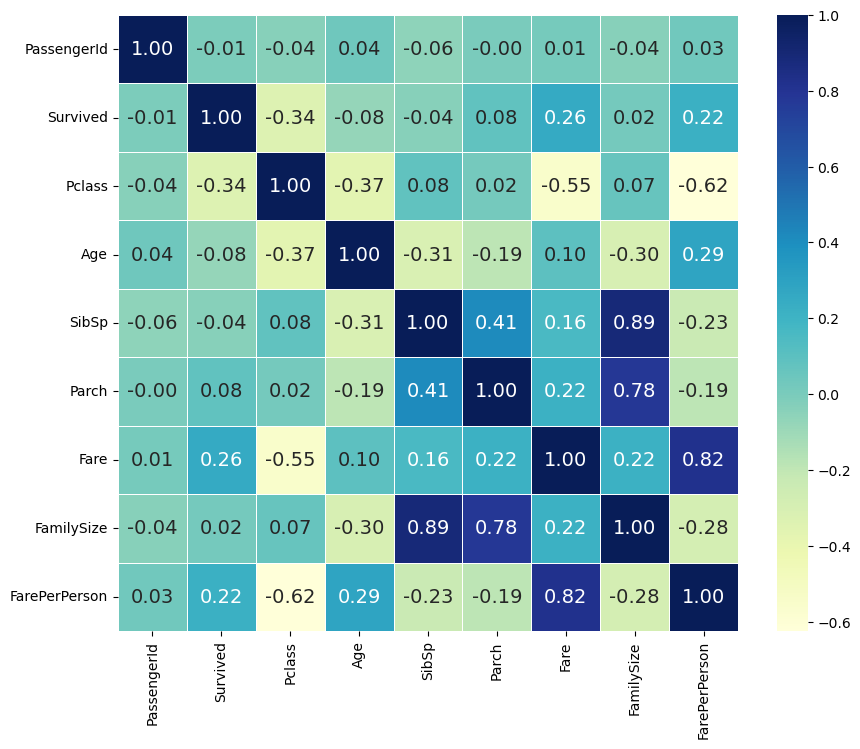

In [144]:
import seaborn as sns
corr_matrix = titanic.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

In [145]:
titanic.drop(["FamilySize", "FarePerPerson"], axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [160]:
titanic["Cabin"] = titanic["Cabin"].astype(str)

In [165]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [166]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
titanic['Deck'] = titanic['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [167]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [169]:
titanic["Deck"].value_counts()

Deck
C    59
B    47
D    33
E    33
A    15
F    12
G     4
T     1
Name: count, dtype: int64

In [171]:
titanic["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [172]:
type(titanic["Pclass"][0])

numpy.int64

## Preparing the Data for ML Algorithms

In [155]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

### Data Cleaning

In [156]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(sparse_output=False))
])

num_attrs = ["Age", "SibSp", "Parch", "Fare"]
cat_attrs = ["Pclass", "Sex", "Embarked", "Deck"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attrs),
    ("cat", cat_pipeline, cat_attrs)
])

In [191]:
titanic_prepared = preprocessing.fit_transform(titanic)

In [192]:
titanic_prepared_df = pd.DataFrame(titanic_prepared, columns=preprocessing.get_feature_names_out(), index=titanic.PassengerId)
titanic_prepared_df

,num__Age,num__SibSp,num__Parch,num__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Deck_A,cat__Deck_B,cat__Deck_C,cat__Deck_D,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,
1,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,-0.104637,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [193]:
titanic_prepared_df.isna().sum()

num__Age           0
num__SibSp         0
num__Parch         0
num__Fare          0
cat__Pclass_1      0
cat__Pclass_2      0
cat__Pclass_3      0
cat__Sex_female    0
cat__Sex_male      0
cat__Embarked_C    0
cat__Embarked_Q    0
cat__Embarked_S    0
cat__Deck_A        0
cat__Deck_B        0
cat__Deck_C        0
cat__Deck_D        0
cat__Deck_E        0
cat__Deck_F        0
cat__Deck_G        0
cat__Deck_T        0
dtype: int64

# 5. Modelling

In [198]:
from sklearn.model_selection import train_test_split

X = titanic_prepared_df
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [216]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        print(name)
        print(classification_report(y_test, model.predict(X_test)))
    return model_scores

In [217]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

LogisticRegression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       138
           1       0.77      0.71      0.74        85

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       138
           1       0.76      0.67      0.71        85

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

RandomForest
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       138
           1       0.79      0.69      0.74        85

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81     

{'LogisticRegression': 0.8071748878923767,
 'KNN': 0.7937219730941704,
 'RandomForest': 0.8116591928251121,
 'SVC': 0.7892376681614349}

In [219]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear", "lbfgs"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [220]:
gs_log_reg.best_score_

np.float64(0.8157894736842106)

In [222]:
rf_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [20],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid,
                    cv=5,
                    verbose=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


D:\machine_learning\env\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=True)

In [224]:
gs_rf.best_score_

np.float64(0.8232970485916283)

In [225]:
gs_rf.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [226]:
titanic_test = pd.read_csv("./data/titanic/test.csv")

In [241]:
titanic_test["Cabin"] = titanic_test["Cabin"].astype(str)
titanic_test['Deck'] = titanic['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
X_test_prepared = preprocessing.transform(titanic_test)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=preprocessing.get_feature_names_out(), index=titanic_test.PassengerId)

In [242]:
y_predict = gs_rf.best_estimator_.predict(X_test_prepared)

In [243]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [256]:
results = pd.DataFrame({"PassengerId": titanic_test.PassengerId, "Survived": y_predict})
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [257]:
results.to_csv("result.csv", index=False)

In [259]:
pd.Series(y_predict).value_counts()

0    283
1    135
Name: count, dtype: int64

In [260]:
import joblib
joblib.dump(gs_rf.best_estimator_, "titanic_model.pkl")

['titanic_model.pkl']